<a href="https://colab.research.google.com/github/mashaan14/python-tutorials/blob/main/kmeans_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding k-menas using numpy functions


In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [25]:
np.random.seed(0)
X = np.concatenate((np.ones((5, 2)), 5*np.ones((5, 2))), axis=0)
X = X+np.random.normal(0, 0.5, size=X.shape)
display(pd.DataFrame(X))

,0,1
0,1.882026,1.200079
1,1.489369,2.120447
2,1.933779,0.511361
3,1.475044,0.924321
4,0.948391,1.205299
5,5.072022,5.727137
6,5.380519,5.060838
7,5.221932,5.166837
8,5.747040,4.897421
9,5.156534,4.572952


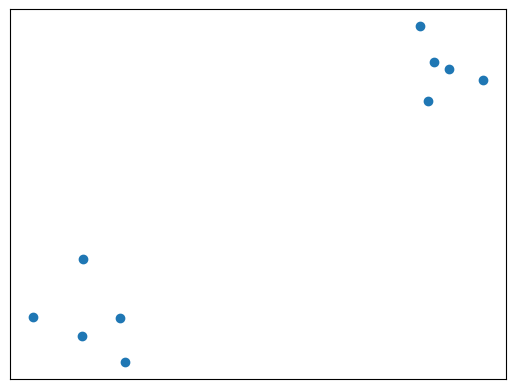

In [26]:
plt.scatter(X[:,0], X[:,1]);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);

In [27]:
C = np.concatenate((np.random.uniform(np.min(X[:,0]),np.max(X[:,0]),(2,1)), np.random.uniform(np.min(X[:,1]),np.max(X[:,1]),(2,1))), axis=1)
display(pd.DataFrame(C))

,0,1
0,1.636293,3.233205
1,5.481525,2.674145


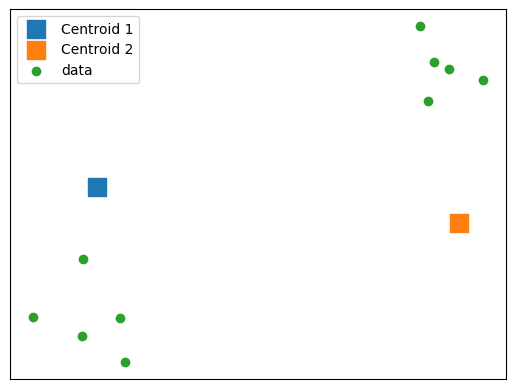

In [28]:
legend_label = ['Centroid 1', 'Centroid 2', 'data']
for i in range(C.shape[0]):
  plt.scatter(C[i,0], C[i,1], s=150, marker='s', label=legend_label[i]);
plt.scatter(X[:,0], X[:,1], label=legend_label[-1]);
plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
plt.legend()
plt.savefig('data.png', bbox_inches='tight', dpi=600)

In [29]:
D = np.sqrt(np.square(X[:, None, :] - C[None, :, :]).sum(axis=-1))
display(pd.DataFrame(D))

,0,1
0,2.047923,3.889635
1,1.122416,4.030371
2,2.738053,4.155013
3,2.314507,4.371930
4,2.141404,4.765167
5,4.245460,3.080333
6,4.166470,2.388829
7,4.073787,2.506173
8,4.434846,2.239075
9,3.766566,1.926419


In [30]:
Di = np.argmin(D, axis=1)
display(pd.DataFrame(Di))

,0
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,1


In [31]:
C1 = np.zeros_like(C)
for i in range(C.shape[0]):
  C1[i,:] = np.mean(X[Di==i], axis=0)

display(pd.DataFrame(C1))

,0,1
0,1.545722,1.192301
1,5.315609,5.085037


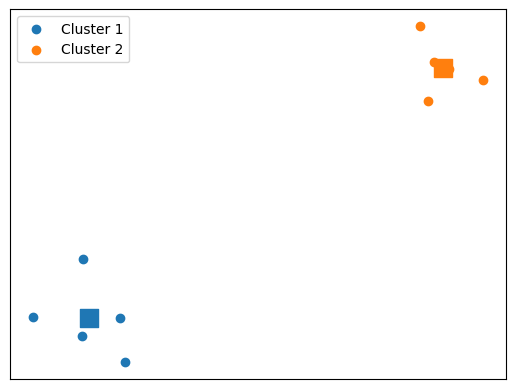

In [32]:
legend_label = ['Cluster 1', 'Cluster 2']
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for i in range(C1.shape[0]):
  plt.scatter(C1[i,0], C1[i,1], s=150, marker='s', c=new_colors[i]);

for i in np.unique(Di):
    ix = np.where(Di == i)
    plt.scatter(X[ix,0], X[ix,1], c=new_colors[i], label=legend_label[i])

plt.tick_params(axis='both',which='both',bottom=False,top=False,left=False,right=False,
                labelbottom=False,labeltop=False,labelleft=False,labelright=False);
plt.legend()
plt.savefig('clusters.png', bbox_inches='tight', dpi=600)